# Arquitectura de red convolucional

Ya hemos visto las tres cápas más comunes de redes convolucionales, así que ahora vamos a construir una de ejemplo

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ConvolutionalNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))   # Convolutional layer 1
        print(x.shape)
        x = self.pool(x)            # Pooling layer 1
        print(x.shape)
        x = F.relu(self.conv2(x))   # Convolutional layer 2
        print(x.shape)
        x = self.pool(x)            # Pooling layer 2
        print(x.shape)
        x = torch.flatten(x, start_dim=1)     # flatten all dimensions except batch
        x = F.relu(self.fc1(x))     # Fully connected layer 1
        x = F.relu(self.fc2(x))     # Fully connected layer 2
        x = self.fc3(x)             # Fully connected layer 3
        return x


net = ConvolutionalNet()
net

ConvolutionalNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

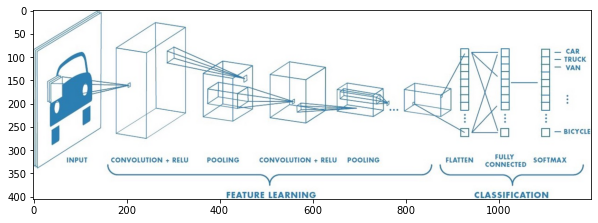

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('Imagenes/CNN.jpeg')
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [6]:
import numpy as np
import torch

array = np.array(img)
tensor = torch.from_numpy(array)
tensor.shape

torch.Size([405, 1200, 3])

In [7]:
tensor = tensor.permute(2, 0, 1)
tensor.shape

torch.Size([3, 405, 1200])

In [8]:
out = net(tensor.unsqueeze(0).float())

torch.Size([1, 6, 401, 1196])
torch.Size([1, 6, 200, 598])
torch.Size([1, 16, 196, 594])
torch.Size([1, 16, 98, 297])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x465696 and 400x120)